In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\BR\employee_survey.csv")

In [5]:
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB(Work Life Balance),WorkEnv,...,SleepHours,CommuteMode,CommuteDistance (KM),NumCompanies,TeamSize,NumReports,EduLevel,haveOT (Overtime),TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5


In [17]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [19]:
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB(Work Life Balance),WorkEnv,PhysicalActivityHours(Weekly),Workload,Stress,SleepHours,CommuteMode,CommuteDistance (KM),NumCompanies,TeamSize,NumReports,EduLevel,haveOT (Overtime),TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,2.5,2,1,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,1.8,2,2,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,2.1,5,4,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,1.9,3,1,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,3.7,2,1,4.9,Car,20,0,7,0,Bachelor,False,20.5,5


In [ ]:
##1. What is the distribution of job satisfaction scores among employees? 

In [29]:
df['JobSatisfaction'].value_counts().sort_values(ascending = False)

JobSatisfaction
4    1249
3     566
5     516
1     417
2     277
Name: count, dtype: int64

In [ ]:
##2. How does work-life balance (WLB) vary across different departments?  

In [33]:
df.groupby("Dept")["WLB(Work Life Balance)"].mean()

Dept
Customer Service    2.761905
Finance             3.097331
HR                  2.769231
IT                  3.050388
Legal               3.102941
Marketing           3.142405
Operations          3.061538
Sales               3.181495
Name: WLB(Work Life Balance), dtype: float64

In [ ]:
##3. Is there a correlation between physical activity hours and stress levels?  

In [37]:
df['PhysicalActivityHours(Weekly)'].corr(df['Stress'])

-0.011802598172823482

In [ ]:
"""The correlation  between both variables is a negative, which means there's absolutely no correlation"""

In [ ]:
##4. How does commute distance affect sleep hours among employees?  

In [41]:
df["CommuteDistance (KM)"].corr(df["SleepHours"])

0.036100623137312216

In [43]:
"""Commute distance doesn't impact on sleephours"""

"Commute distance doesn't impact on sleephours"

In [ ]:
##5. What is the average job satisfaction score for employees who work overtime versus those who don’t? 

In [55]:
employees = df.groupby("haveOT (Overtime)")["JobSatisfaction"].mean()
employees_with_overtime = employees[True]
employees_without_overtime = employees[False]
employees_with_overtime, employees_without_overtime

(3.1004273504273505, 3.515078985160364)

In [57]:
##6. How does job satisfaction differ between full-time and part-time employees?  

In [63]:
employee_sat = df.groupby("EmpType")["JobSatisfaction"].mean()

In [67]:
employee_sat[["Full-Time","Part-Time"]].reset_index()

,EmpType,JobSatisfaction
0,Full-Time,3.400096
1,Part-Time,3.348438


In [69]:
##7. Are there differences in stress levels between employees of different marital statuses?  

In [75]:
df.groupby("MaritalStatus")["Stress"].mean().reset_index(name = "Stress Levels")

,MaritalStatus,Stress Levels
0,Divorced,1.629630
1,Married,1.751611
2,Single,1.736952
3,Widowed,1.000000


In [ ]:
##8. How does workload impact job satisfaction across different job levels?  

In [81]:
workload_impact_across_levels = df.groupby("JobLevel")[["Workload","JobSatisfaction"]].corr()
workload_impact_across_levels

Workload  JobSatisfaction
JobLevel                                                 
Intern/Fresher Workload         1.000000        -0.208160
               JobSatisfaction -0.208160         1.000000
Junior         Workload         1.000000        -0.275658
               JobSatisfaction -0.275658         1.000000
Lead           Workload         1.000000        -0.249570
               JobSatisfaction -0.249570         1.000000
Mid            Workload         1.000000        -0.257160
               JobSatisfaction -0.257160         1.000000
Senior         Workload         1.000000        -0.246076
               JobSatisfaction -0.246076         1.000000

In [ ]:
##9. What is the relationship between age and job satisfaction?  

In [83]:
df["Age"].corr(df["JobSatisfaction"])

-0.006432835742474092

In [85]:
"""No correlation, so not much of a relationship there"""

'No correlation, so not much of a relationship there'

In [ ]:
##10. How does the number of companies an employee has worked for affect their current job satisfaction?  

In [91]:
df["NumCompanies"].corr(df["JobSatisfaction"])

-0.0039287101855759185

In [ ]:
##11. Does the size of the team an employee works in influence their job satisfaction?  

In [95]:
df["TeamSize"].corr(df['JobSatisfaction'])

0.002340998833948775

In [ ]:
##12. How does job satisfaction vary between employees with different educational levels?  

In [101]:
df.groupby("EduLevel")["JobSatisfaction"].mean().reset_index()

,EduLevel,JobSatisfaction
0,Bachelor,3.345652
1,High School,3.432653
2,Master,3.728947
3,PhD,2.920000


In [ ]:
##13. Is there a relationship between training hours per year and job satisfaction?  

In [105]:
df["TrainingHoursPerYear"].corr(df["JobSatisfaction"])

-0.005604895706623596

In [109]:
"""No relationship"""

'No relationship'

In [ ]:
##14. How does job satisfaction differ between employees who use different commute modes? 

In [113]:
df.groupby("CommuteMode")["JobSatisfaction"].mean().reset_index()

,CommuteMode,JobSatisfaction
0,Bike,3.350917
1,Car,3.446182
2,Motorbike,3.435484
3,Public Transport,3.318436
4,Walk,3.377104


In [ ]:
##15. Are employees with higher work-life balance scores more likely to report higher job satisfaction? 

In [135]:
df['WLB(Work Life Balance)'].corr(df["JobSatisfaction"])

0.2596872800125277

In [165]:
"""It's a positive correlation — as one variable increases, the other tends to increase too.
But it’s weak — the relationship exists but isn’t strong or consistent."""

"It's a positive correlation — as one variable increases, the other tends to increase too.\nBut it’s weak — the relationship exists but isn’t strong or consistent."

In [ ]:
##16. How does job satisfaction vary between employees in different job levels (e.g., Junior, Mid, Senior)?  

In [139]:
df.groupby("JobLevel")['JobSatisfaction'].mean().reset_index()

,JobLevel,JobSatisfaction
0,Intern/Fresher,3.356436
1,Junior,3.377076
2,Lead,3.316062
3,Mid,3.407311
4,Senior,3.408793


In [ ]:
##17. Is there a correlation between sleep hours and job satisfaction? 

In [143]:
df['SleepHours'].corr(df['JobSatisfaction'])

0.17987180889446475

In [ ]:
##18. How does job satisfaction differ between employees with and without overtime?

In [149]:
df.groupby("haveOT (Overtime)")["JobSatisfaction"].mean().reset_index()

,haveOT (Overtime),JobSatisfaction
0,False,3.515079
1,True,3.100427


In [ ]:
##19. What is the relationship between work environment ratings and job satisfaction?  

In [157]:
"""using pearson and spearman"""
pearson_method = df["WorkEnv"].corr(df['JobSatisfaction'], method = 'pearson')
pearson_method

0.24873001927225785

In [159]:
spearman_method = df["WorkEnv"].corr(df['JobSatisfaction'], method = 'spearman')
spearman_method

0.25035517979545674

<Axes: xlabel='WorkEnv', ylabel='JobSatisfaction'>

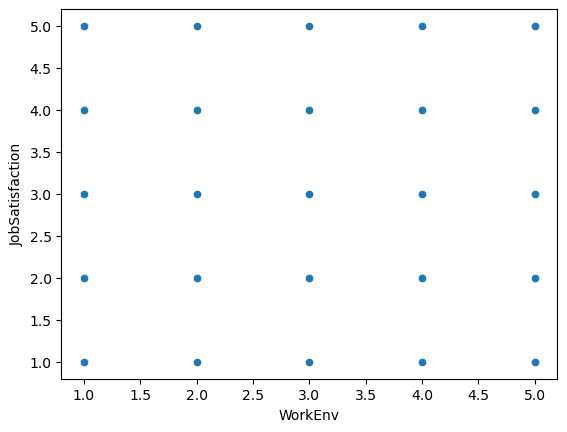

In [161]:
sns.scatterplot(x = "WorkEnv", y = 'JobSatisfaction', data = df)

In [ ]:
##20. Are there differences in job satisfaction between employees of different genders?  

In [169]:
df.groupby("Gender")["JobSatisfaction"].mean()

Gender
Female    3.393548
Male      3.371073
Other     3.447471
Name: JobSatisfaction, dtype: float64

In [ ]:
##21. How does job satisfaction vary based on the number of reports an employee has? 

In [175]:
df.groupby("NumReports")["JobSatisfaction"].mean()

NumReports
0    3.389172
1    3.283237
2    3.620253
3    3.442308
4    3.475676
5    3.474074
6    3.281437
7    3.298246
8    3.342105
9    3.259494
Name: JobSatisfaction, dtype: float64

In [177]:
df['NumReports'].corr(df["JobSatisfaction"], method = "pearson")

-0.02061069138313293

In [ ]:
##22. Is there a relationship between commute distance and job satisfaction?

In [183]:
df['CommuteDistance (KM)'].corr(df["JobSatisfaction"], method = "pearson")

0.0007733230806719511

<Axes: xlabel='CommuteDistance (KM)', ylabel='JobSatisfaction'>

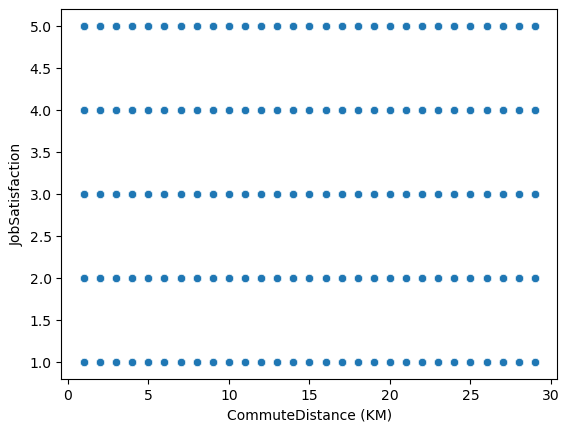

In [185]:
sns.scatterplot(x = 'CommuteDistance (KM)', y = "JobSatisfaction", data = df)

In [ ]:
##23. How does job satisfaction differ between employees in different age groups? 

In [205]:
bins = [20, 25,30,35,40,45,50,55,60,65]

In [207]:
labels = ["20-25","26-30","31-35","36-40","41-45","45-50","51-55","56-60","61-65"]

In [209]:
df["Age_groups"] = pd.cut(df["Age"], bins = bins, labels = labels)

In [211]:
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB(Work Life Balance),WorkEnv,PhysicalActivityHours(Weekly),Workload,Stress,SleepHours,CommuteMode,CommuteDistance (KM),NumCompanies,TeamSize,NumReports,EduLevel,haveOT (Overtime),TrainingHoursPerYear,JobSatisfaction,Age_groups
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,2.5,2,1,7.6,Car,20,3,12,0,Bachelor,True,33.5,5,31-35
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,1.8,2,2,7.9,Car,15,4,11,0,Bachelor,False,36.0,5,31-35
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,2.1,5,4,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5,20-25
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,1.9,3,1,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5,26-30
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,3.7,2,1,4.9,Car,20,0,7,0,Bachelor,False,20.5,5,20-25


In [215]:
df.groupby("Age_groups")["JobSatisfaction"].mean().reset_index()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11332\1151119381.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_groups")["JobSatisfaction"].mean().reset_index()


,Age_groups,JobSatisfaction
0,20-25,3.363790
1,26-30,3.438462
2,31-35,3.400000
3,36-40,3.359848
4,41-45,3.388889
5,45-50,3.464945
6,51-55,3.301724
7,56-60,3.319328
8,61-65,NaN


In [ ]:
##24. Are employees with higher physical activity hours more likely to report lower stress levels?

In [222]:
df['PhysicalActivityHours(Weekly)'].corr(df['Stress'], method = 'spearman')

-0.009777989964974376

In [226]:
df['activity_group'] = pd.cut(df['PhysicalActivityHours(Weekly)'], bins=[0,2,4,6,10], labels=['Low','Moderate','High','Very High'])
df.groupby('activity_group')['Stress'].mean()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11332\2284060477.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('activity_group')['Stress'].mean()


activity_group
Low          1.751029
Moderate     1.717436
High         1.812500
Very High         NaN
Name: Stress, dtype: float64

<Axes: xlabel='PhysicalActivityHours(Weekly)', ylabel='Stress'>

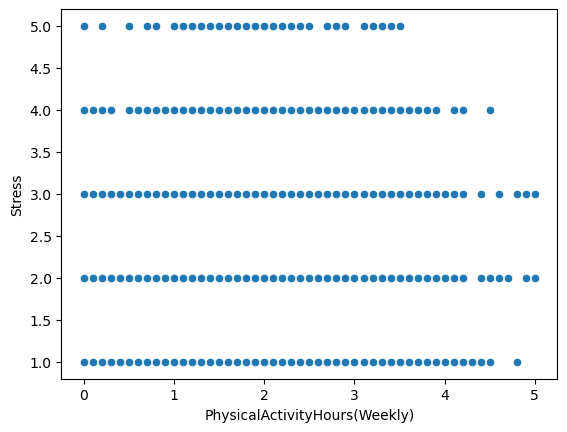

In [228]:
sns.scatterplot(x = "PhysicalActivityHours(Weekly)", y = "Stress", data = df)

In [ ]:
##25. How does job satisfaction vary between employees with different levels of experience? 

In [238]:
bins = [1, 5, 10, 15, 20, 25, 30]
labels = ['1-5 yrs', '6-10 yrs', '11-15 yrs', '16-20 yrs', '21-25 yrs', '26-30 yrs']
df['experience_group'] = pd.cut(df['Experience'], bins=bins, labels=labels, include_lowest=True)

In [242]:
df.groupby("experience_group")["JobSatisfaction"].mean()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11332\847602852.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("experience_group")["JobSatisfaction"].mean()


experience_group
1-5 yrs      3.417659
6-10 yrs     3.430536
11-15 yrs    3.333333
16-20 yrs    3.335484
21-25 yrs    3.326425
26-30 yrs    3.465753
Name: JobSatisfaction, dtype: float64

In [ ]:
##26. Is there a correlation between workload and stress levels?  

In [250]:
df['Workload'].corr(df['Stress'], method = 'spearman')

0.00745946640096463

In [ ]:
##27. How does job satisfaction differ between employees in different departments (e.g., IT, Finance, Marketing)? 

In [256]:
df.groupby("Dept")["JobSatisfaction"].mean().reset_index()

,Dept,JobSatisfaction
0,Customer Service,3.312925
1,Finance,3.437991
2,HR,3.398601
3,IT,3.282946
4,Legal,3.393382
5,Marketing,3.348101
6,Operations,3.465934
7,Sales,3.498221


In [ ]:
##28. Are employees with longer commutes more likely to report lower work-life balance?

In [258]:
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB(Work Life Balance),WorkEnv,PhysicalActivityHours(Weekly),Workload,Stress,SleepHours,CommuteMode,CommuteDistance (KM),NumCompanies,TeamSize,NumReports,EduLevel,haveOT (Overtime),TrainingHoursPerYear,JobSatisfaction,Age_groups,activity_group,experience_group
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,2.5,2,1,7.6,Car,20,3,12,0,Bachelor,True,33.5,5,31-35,Moderate,6-10 yrs
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,1.8,2,2,7.9,Car,15,4,11,0,Bachelor,False,36.0,5,31-35,Low,11-15 yrs
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,2.1,5,4,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5,20-25,Moderate,1-5 yrs
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,1.9,3,1,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5,26-30,Low,6-10 yrs
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,3.7,2,1,4.9,Car,20,0,7,0,Bachelor,False,20.5,5,20-25,Moderate,1-5 yrs


<Axes: xlabel='CommuteDistance (KM)', ylabel='WLB(Work Life Balance)'>

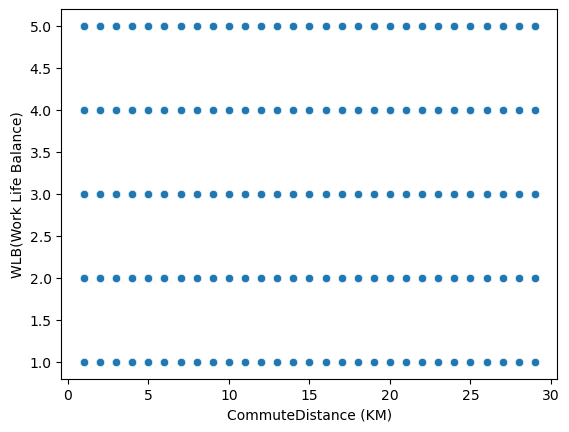

In [260]:
sns.scatterplot( x = 'CommuteDistance (KM)', y = 'WLB(Work Life Balance)', data = df)

In [262]:
df['CommuteDistance (KM)'].corr(df['WLB(Work Life Balance)'])

0.0030042448158307438

In [ ]:
"""this means no real relationship"""

In [270]:
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0–5 km', '6–10 km', '11–15 km', '16–20 km', '21–25 km', '26–30 km']
df['commute_group'] = pd.cut(df['CommuteDistance (KM)'], bins=bins,labels = labels)

In [278]:
df.groupby("commute_group")["WLB(Work Life Balance)"].mean().reset_index().sort_values("WLB(Work Life Balance)")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11332\3914779060.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("commute_group")["WLB(Work Life Balance)"].mean().reset_index().sort_values("WLB(Work Life Balance)")


,commute_group,WLB(Work Life Balance)
4,21–25 km,2.995444
0,0–5 km,3.037500
2,11–15 km,3.048936
1,6–10 km,3.087278
3,16–20 km,3.094737
5,26–30 km,3.110769


In [ ]:
##29. How does job satisfaction vary between employees with different marital statuses? 

In [284]:
df.groupby("MaritalStatus")["JobSatisfaction"].mean().reset_index()

,MaritalStatus,JobSatisfaction
0,Divorced,3.523810
1,Married,3.324266
2,Single,3.428671
3,Widowed,4.000000


In [286]:
"""it's seems widowed are those with highes job satisfaction, lol"""

"it's seems widowed are those with highes job satisfaction, lol"

In [ ]:
##30. Is there a relationship between team size and work-life balance?  

In [290]:
df["TeamSize"].corr(df["WLB(Work Life Balance)"])

-0.024148571854883557

In [ ]:
##31. How does job satisfaction differ between employees who work in different-sized teams?  

In [ ]:
bins = [1,5,10,15,20,25,30]

In [300]:
labels = ["1-5","6-10","11-15","16-20","21-25","26-30"]

In [302]:
df["team_size_group"] = pd.cut(df["TeamSize"], bins = bins, labels = labels)

In [304]:
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB(Work Life Balance),WorkEnv,PhysicalActivityHours(Weekly),Workload,Stress,SleepHours,CommuteMode,CommuteDistance (KM),NumCompanies,TeamSize,NumReports,EduLevel,haveOT (Overtime),TrainingHoursPerYear,JobSatisfaction,Age_groups,activity_group,experience_group,commute_group,team_size_group
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,2.5,2,1,7.6,Car,20,3,12,0,Bachelor,True,33.5,5,31-35,Moderate,6-10 yrs,16–20 km,11-15
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,1.8,2,2,7.9,Car,15,4,11,0,Bachelor,False,36.0,5,31-35,Low,11-15 yrs,11–15 km,11-15
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,2.1,5,4,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5,20-25,Moderate,1-5 yrs,16–20 km,26-30
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,1.9,3,1,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5,26-30,Low,6-10 yrs,11–15 km,6-10
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,3.7,2,1,4.9,Car,20,0,7,0,Bachelor,False,20.5,5,20-25,Moderate,1-5 yrs,16–20 km,6-10


In [308]:
df.groupby("team_size_group")["JobSatisfaction"].mean().reset_index()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11332\4107878687.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("team_size_group")["JobSatisfaction"].mean().reset_index()


,team_size_group,JobSatisfaction
0,1-5,3.402062
1,6-10,3.370840
2,11-15,3.405080
3,16-20,3.383784
4,21-25,3.367568
5,26-30,3.429134


In [ ]:
##32. Are employees with higher training hours more likely to report higher job satisfaction? 

In [312]:
df['TrainingHoursPerYear'].corr(df["JobSatisfaction"])

-0.005604895706623596

In [ ]:
"""No""

<Axes: xlabel='TrainingHoursPerYear', ylabel='JobSatisfaction'>

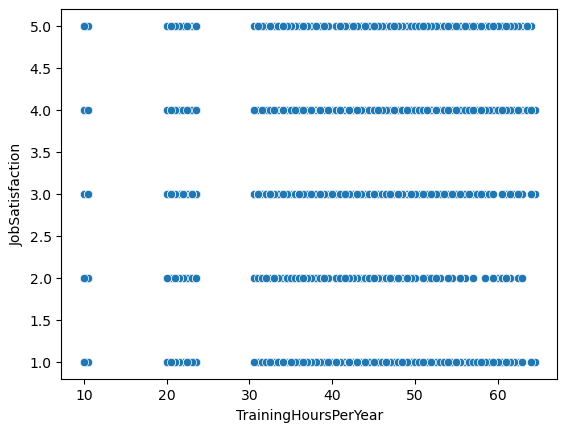

In [314]:
sns.scatterplot( x = "TrainingHoursPerYear", y = "JobSatisfaction", data = df)

In [ ]:
##33. How does job satisfaction vary between employees with different commute modes?  

In [320]:
df.groupby("CommuteMode")["JobSatisfaction"].mean().reset_index()

,CommuteMode,JobSatisfaction
0,Bike,3.350917
1,Car,3.446182
2,Motorbike,3.435484
3,Public Transport,3.318436
4,Walk,3.377104


In [ ]:
##34. Is there a correlation between job level and workload?  

<Axes: xlabel='JobLevel', ylabel='Workload'>

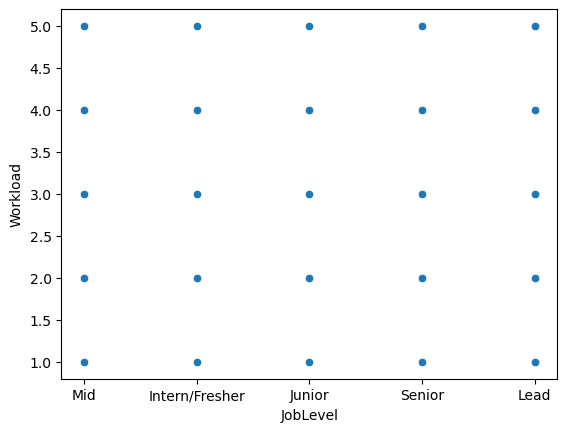

In [326]:
sns.scatterplot( x = "JobLevel", y = "Workload", data =df)

In [328]:
df["JobLevel"].value_counts()

JobLevel
Senior            1069
Mid                766
Junior             602
Lead               386
Intern/Fresher     202
Name: count, dtype: int64

In [330]:
experience_map = {'Intern/Fresher': 1,'Junior': 2,'Mid': 3,'Senior': 4,'Lead': 5}

In [332]:
df["JobLevel_mapped_num"] = df["JobLevel"].map(experience_map)

In [344]:
df[["JobLevel_mapped_num", "Workload"]].corr()

,JobLevel_mapped_num,Workload
JobLevel_mapped_num,1.000000,-0.000868
Workload,-0.000868,1.000000


In [338]:
"""Based on the data, job level does not predict or influence workload — everyone seems to be working just as hard regardless of level """

'Based on the data, job level does not predict or influence workload — everyone seems to be working just as hard regardless of level '

In [ ]:
##35. How does job satisfaction differ between employees with different levels of physical activity?  

In [348]:
bins = [0, 0.5, 1.5, 3, 4.5, 5]
labels = ['Inactive', 'Very Light', 'Light', 'Moderate', 'Active']
df['activity_level'] = pd.cut(df['PhysicalActivityHours(Weekly)'], bins=bins, labels=labels, include_lowest=True)

In [350]:
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB(Work Life Balance),WorkEnv,PhysicalActivityHours(Weekly),Workload,Stress,SleepHours,CommuteMode,CommuteDistance (KM),NumCompanies,TeamSize,NumReports,EduLevel,haveOT (Overtime),TrainingHoursPerYear,JobSatisfaction,Age_groups,activity_group,experience_group,commute_group,team_size_group,JobLevel_mapped_num,activity_level
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,2.5,2,1,7.6,Car,20,3,12,0,Bachelor,True,33.5,5,31-35,Moderate,6-10 yrs,16–20 km,11-15,3,Light
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,1.8,2,2,7.9,Car,15,4,11,0,Bachelor,False,36.0,5,31-35,Low,11-15 yrs,11–15 km,11-15,3,Light
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,2.1,5,4,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5,20-25,Moderate,1-5 yrs,16–20 km,26-30,1,Light
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,1.9,3,1,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5,26-30,Low,6-10 yrs,11–15 km,6-10,2,Light
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,3.7,2,1,4.9,Car,20,0,7,0,Bachelor,False,20.5,5,20-25,Moderate,1-5 yrs,16–20 km,6-10,2,Moderate


In [356]:
activity_level_jobsatisfaction = df.groupby("activity_level")["JobSatisfaction"].mean().reset_index()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11332\1704504917.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activity_level_jobsatisfaction = df.groupby("activity_level")["JobSatisfaction"].mean().reset_index()


In [360]:
activity_level_jobsatisfaction

,activity_level,JobSatisfaction
0,Inactive,3.346535
1,Very Light,3.339096
2,Light,3.452012
3,Moderate,3.253363
4,Active,3.200000


In [ ]:
##36. Are employees with higher stress levels more likely to report lower job satisfaction?  

In [364]:
df[["Stress","JobSatisfaction"]].corr()

,Stress,JobSatisfaction
Stress,1.000000,-0.214383
JobSatisfaction,-0.214383,1.000000


In [366]:
"""There is a weak negative correlation (r = -0.21) between stress levels and job satisfaction, indicating that employees with higher stress levels tend to report slightly lower job satisfaction."""

'There is a weak negative correlation (r = -0.21) between stress levels and job satisfaction, indicating that employees with higher stress levels tend to report slightly lower job satisfaction.'

In [ ]:
##37. How does job satisfaction vary between employees with different commute distances?

In [370]:
df.groupby("commute_group")["JobSatisfaction"].mean()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11332\977896775.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("commute_group")["JobSatisfaction"].mean()


commute_group
0–5 km      3.400000
6–10 km     3.377219
11–15 km    3.382979
16–20 km    3.351579
21–25 km    3.412301
26–30 km    3.403077
Name: JobSatisfaction, dtype: float64

In [ ]:
##38. Is there a relationship between age and work-life balance? 

In [372]:
df[["Age", "WLB(Work Life Balance)"]].corr()

,Age,WLB(Work Life Balance)
Age,1.00000,-0.01476
WLB(Work Life Balance),-0.01476,1.00000


In [374]:
"""The correlation between age and work-life balance is approximately zero (r = -0.015), indicating no meaningful linear relationship between the two variables."""

'The correlation between age and work-life balance is approximately zero (r = -0.015), indicating no meaningful linear relationship between the two variables.'

In [380]:
df.groupby("Age_groups")['WLB(Work Life Balance)'].mean().reset_index(name = 'Average Work Life Balance')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11332\1726620393.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_groups")['WLB(Work Life Balance)'].mean().reset_index(name = 'Average Work Life Balance')


,Age_groups,Average Work Life Balance
0,20-25,3.086294
1,26-30,3.080769
2,31-35,3.047170
3,36-40,3.043561
4,41-45,3.243590
5,45-50,3.007380
6,51-55,2.961207
7,56-60,2.949580
8,61-65,NaN


In [ ]:
##39. How does job satisfaction differ between employees with different job types (e.g., Contract, Part-Time, Full-Time)? 

In [384]:
df.groupby("EmpType")["JobSatisfaction"].mean()

EmpType
Contract     3.376623
Full-Time    3.400096
Part-Time    3.348438
Name: JobSatisfaction, dtype: float64

In [ ]:
##40. Are employees with higher sleep hours more likely to report higher job satisfaction?

In [392]:
bins = [1, 3, 5, 6.5, 8, 10]
labels = ['Severely Sleep Deprived', 'Sleep Deprived', 'Insufficient', 'Normal', 'Well Rested']
df['sleep_category'] = pd.cut(df['SleepHours'], bins=bins, labels=labels, include_lowest=True)

In [398]:
df.groupby("sleep_category")["JobSatisfaction"].mean().reset_index()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11332\2391148026.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("sleep_category")["JobSatisfaction"].mean().reset_index()


,sleep_category,JobSatisfaction
0,Severely Sleep Deprived,NaN
1,Sleep Deprived,2.957143
2,Insufficient,3.198267
3,Normal,3.400892
4,Well Rested,3.779698


In [400]:
"""Apparently, Employees in the normal and well rested sleep category have the highest job satisfaction levels"""

'Apparently, Employees in the normal and well rested sleep category have the highest job satisfaction levels'